In [3]:
import os
import glob
import pickle
import pandas as pd
def join_commit_codes(commit):
    return ''.join([' '.join(file) for file in commit])

def flatten(l):
    return [item for sublist in l for item in sublist]
current_directory = os.getcwd()
from projectData import ProjectData

In [4]:
apache_jit_total = pd.read_pickle(current_directory + '/apache_sources/totalApacheCommits.pkl')
apache_jit_total

,commit_id,project,buggy,fix,year,author_date,la,ld,nf,nd,...,age,nuc,aexp,arexp,asexp,commit_message,added_code,removed_code,files_exts,files
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,groovy,0.0,0.0,2003.0,1.070356e+09,372.0,23.0,8.0,3.0,...,3.625000,2.125000,243.0,243.000000,0.683585,"Added the front end parsing for switch, throw,...","[[], [], [package org.codehaus.groovy.ast.stmt...","[[], [], [], [], [], [], [], []]","[classpath, project, java, java, java, java, j...",[ --git a/.classpath b/.classpath\nindex af9d0...
1,192b631e7be302ecde822546ba70a9853ddbda01,groovy,0.0,0.0,2003.0,1.063298e+09,2.0,2.0,2.0,2.0,...,0.000000,2.500000,19.0,19.000000,14.000000,Fixing some debug stuff.\n\n\ngit-svn-id: http...,"[[return super.toString() + <STR>;], [return <...","[[return super.toString() + <STR>;], [return s...","[java, java]",[ --git a/src/main/org/codehaus/groovy/syntax/...
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,groovy,0.0,0.0,2003.0,1.069705e+09,41.0,26.0,3.0,3.0,...,5.333333,45.000000,233.0,233.000000,0.000606,Added support for Ruby / Python style inject m...,"[[], [public static Object inject(Collection s...","[[], [], []]","[txt, java, groovy]",[ --git a/TODO.txt b/TODO.txt\nindex 0c8a28ca7...
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,groovy,0.0,0.0,2003.0,1.068488e+09,8.0,6.0,2.0,1.0,...,3.000000,35.500000,64.0,64.000000,55.000000,Front-end fix for GROOVY-41\n\nBackend borks o...,"[[case ( Token.LOGICAL_AND ):, case ( Token.LO...","[[], [if ( lt() == Token.LOGICAL_OR ), rootNod...","[java, java]",[ --git a/src/main/org/codehaus/groovy/syntax/...
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,groovy,0.0,0.0,2003.0,1.063314e+09,70.0,4.0,6.0,3.0,...,0.000000,6.000000,27.0,27.000000,22.000000,Range expressions.\n\n\ngit-svn-id: http://svn...,"[[public static final int DOT_DOT = <NUM>;, ad...","[[], [token = Token.dot( getStartLine(),, getS...","[java, java, java, java, java, java]",[ --git a/src/main/org/codehaus/groovy/syntax/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106669,4ea443ceffa4445003aa5c8448017eb430cedff3,ignite,0.0,0.0,2019.0,1.548335e+09,332.0,7.0,6.0,4.0,...,30.333333,24.666667,16.0,10.000000,16.000000,IGNITE-10944 Added discovery data to PluginPro...,"[[import java.io.Serializable;, import java.ut...","[[return null;, plugin.validateNewNode(node);,...","[java, java, apache, java, java, java]",[ --git a/modules/core/src/main/java/org/apach...
106670,2b5bb149a367826a607d13ca4873ea3db6351f21,ignite,0.0,0.0,2019.0,1.570788e+09,5.0,5.0,4.0,3.0,...,64.500000,61.250000,74.0,50.166667,71.000000,GNITE-12271 Fix byte order in PDS code for Big...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,"[java, java, java, java]",[ --git a/modules/core/src/main/java/org/apach...
106671,e66bbef97b2cef73a533ce8a506ec479852cb364,ignite,0.0,0.0,2019.0,1.574936e+09,133.0,22.0,2.0,1.0,...,151.000000,49.000000,11.0,9.833333,11.000000,IGNITE-12219: Cache operations performance met...,[[import org.apache.ignite.internal.processors...,[[private final AtomicLongMetric putTimeNanos;...,"[java, java]",[ --git a/modules/core/src/main/java/org/apach...
106672,de16d6b47c9d3ccd6b172a27540a6a7d2d0a9b5b,ignite,0.0,0.0,2019.0,1.560444e+09,327.0,56.0,7.0,3.0,...,127.142857,15.428571,10.0,10.000000,10.000000,IGNITE-10913 Reduce heap occupation by o.a.i.i...,[[package org.apache.ignite.internal.benchmark...,"[[], [private final File cfgFile;, File file,,...","[java, java, java, java, java, java, java]",[ --git a/modules/benchmarks/src/main/java/org...


In [5]:
 # remove non java files
def get_non_java(commit):
    # get indices in commit['file_exts'] array where it is equal to java\
    java_indices = [i for i, x in enumerate(commit['files_exts']) if x == 'java']
    # get the files that are java
    java_files = [commit['files'][i] for i in java_indices]
    commit['files_exts'] = [commit['files_exts'][i] for i in java_indices]
    commit['files'] = java_files
    return commit
apache_jit_total = apache_jit_total.apply(get_non_java,axis=1)
apache_jit_total

,commit_id,project,buggy,fix,year,author_date,la,ld,nf,nd,...,age,nuc,aexp,arexp,asexp,commit_message,added_code,removed_code,files_exts,files
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,groovy,0.0,0.0,2003.0,1.070356e+09,372.0,23.0,8.0,3.0,...,3.625000,2.125000,243.0,243.000000,0.683585,"Added the front end parsing for switch, throw,...","[[], [], [package org.codehaus.groovy.ast.stmt...","[[], [], [], [], [], [], [], []]","[java, java, java, java, java, java]",[ --git a/src/main/org/codehaus/groovy/ast/stm...
1,192b631e7be302ecde822546ba70a9853ddbda01,groovy,0.0,0.0,2003.0,1.063298e+09,2.0,2.0,2.0,2.0,...,0.000000,2.500000,19.0,19.000000,14.000000,Fixing some debug stuff.\n\n\ngit-svn-id: http...,"[[return super.toString() + <STR>;], [return <...","[[return super.toString() + <STR>;], [return s...","[java, java]",[ --git a/src/main/org/codehaus/groovy/syntax/...
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,groovy,0.0,0.0,2003.0,1.069705e+09,41.0,26.0,3.0,3.0,...,5.333333,45.000000,233.0,233.000000,0.000606,Added support for Ruby / Python style inject m...,"[[], [public static Object inject(Collection s...","[[], [], []]",[java],[ --git a/src/main/org/codehaus/groovy/runtime...
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,groovy,0.0,0.0,2003.0,1.068488e+09,8.0,6.0,2.0,1.0,...,3.000000,35.500000,64.0,64.000000,55.000000,Front-end fix for GROOVY-41\n\nBackend borks o...,"[[case ( Token.LOGICAL_AND ):, case ( Token.LO...","[[], [if ( lt() == Token.LOGICAL_OR ), rootNod...","[java, java]",[ --git a/src/main/org/codehaus/groovy/syntax/...
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,groovy,0.0,0.0,2003.0,1.063314e+09,70.0,4.0,6.0,3.0,...,0.000000,6.000000,27.0,27.000000,22.000000,Range expressions.\n\n\ngit-svn-id: http://svn...,"[[public static final int DOT_DOT = <NUM>;, ad...","[[], [token = Token.dot( getStartLine(),, getS...","[java, java, java, java, java, java]",[ --git a/src/main/org/codehaus/groovy/syntax/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106669,4ea443ceffa4445003aa5c8448017eb430cedff3,ignite,0.0,0.0,2019.0,1.548335e+09,332.0,7.0,6.0,4.0,...,30.333333,24.666667,16.0,10.000000,16.000000,IGNITE-10944 Added discovery data to PluginPro...,"[[import java.io.Serializable;, import java.ut...","[[return null;, plugin.validateNewNode(node);,...","[java, java, java, java, java]",[ --git a/modules/core/src/main/java/org/apach...
106670,2b5bb149a367826a607d13ca4873ea3db6351f21,ignite,0.0,0.0,2019.0,1.570788e+09,5.0,5.0,4.0,3.0,...,64.500000,61.250000,74.0,50.166667,71.000000,GNITE-12271 Fix byte order in PDS code for Big...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,"[java, java, java, java]",[ --git a/modules/core/src/main/java/org/apach...
106671,e66bbef97b2cef73a533ce8a506ec479852cb364,ignite,0.0,0.0,2019.0,1.574936e+09,133.0,22.0,2.0,1.0,...,151.000000,49.000000,11.0,9.833333,11.000000,IGNITE-12219: Cache operations performance met...,[[import org.apache.ignite.internal.processors...,[[private final AtomicLongMetric putTimeNanos;...,"[java, java]",[ --git a/modules/core/src/main/java/org/apach...
106672,de16d6b47c9d3ccd6b172a27540a6a7d2d0a9b5b,ignite,0.0,0.0,2019.0,1.560444e+09,327.0,56.0,7.0,3.0,...,127.142857,15.428571,10.0,10.000000,10.000000,IGNITE-10913 Reduce heap occupation by o.a.i.i...,[[package org.apache.ignite.internal.benchmark...,"[[], [private final File cfgFile;, File file,,...","[java, java, java, java, java, java, java]",[ --git a/modules/benchmarks/src/main/java/org...


In [6]:
apache_jit_base = ProjectData('apache_jit',apache_jit_total,lang='Java',multiple_files=True)
apache_jit_full_change = ProjectData('apache_jit',apache_jit_total,lang='Java',multiple_files=True)
apache_jit_special_tokens = ProjectData('apache_jit',apache_jit_total,lang='Java',multiple_files=True)

In [7]:
apache_jit_base.extractLinesFromDF(code_column='files',separate_add_rem=False,preprocess=False,keep_unchanged_lines=False)

,commit_id,project,buggy,fix,year,author_date,la,ld,nf,nd,...,age,nuc,aexp,arexp,asexp,commit_message,added_code,removed_code,files_exts,files
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,groovy,0.0,0.0,2003.0,1.070356e+09,372.0,23.0,8.0,3.0,...,3.625000,2.125000,243.0,243.000000,0.683585,"Added the front end parsing for switch, throw,...","[[], [], [package org.codehaus.groovy.ast.stmt...","[[], [], [], [], [], [], [], []]","[java, java, java, java, java, java]","[[<add> package org.codehaus.groovy.ast.stmt;,..."
1,192b631e7be302ecde822546ba70a9853ddbda01,groovy,0.0,0.0,2003.0,1.063298e+09,2.0,2.0,2.0,2.0,...,0.000000,2.500000,19.0,19.000000,14.000000,Fixing some debug stuff.\n\n\ngit-svn-id: http...,"[[return super.toString() + <STR>;], [return <...","[[return super.toString() + <STR>;], [return s...","[java, java]","[[<del> return super.toString() + ""[text="" + t..."
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,groovy,0.0,0.0,2003.0,1.069705e+09,41.0,26.0,3.0,3.0,...,5.333333,45.000000,233.0,233.000000,0.000606,Added support for Ruby / Python style inject m...,"[[], [public static Object inject(Collection s...","[[], [], []]",[java],[[<add> public static Object inject(Collection...
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,groovy,0.0,0.0,2003.0,1.068488e+09,8.0,6.0,2.0,1.0,...,3.000000,35.500000,64.0,64.000000,55.000000,Front-end fix for GROOVY-41\n\nBackend borks o...,"[[case ( Token.LOGICAL_AND ):, case ( Token.LO...","[[], [if ( lt() == Token.LOGICAL_OR ), rootNod...","[java, java]","[[<add> case ( Token.LOGICAL_AND ):, <add> cas..."
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,groovy,0.0,0.0,2003.0,1.063314e+09,70.0,4.0,6.0,3.0,...,0.000000,6.000000,27.0,27.000000,22.000000,Range expressions.\n\n\ngit-svn-id: http://svn...,"[[public static final int DOT_DOT = <NUM>;, ad...","[[], [token = Token.dot( getStartLine(),, getS...","[java, java, java, java, java, java]","[[<add> public static final int DOT_DOT = 75;,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106669,4ea443ceffa4445003aa5c8448017eb430cedff3,ignite,0.0,0.0,2019.0,1.548335e+09,332.0,7.0,6.0,4.0,...,30.333333,24.666667,16.0,10.000000,16.000000,IGNITE-10944 Added discovery data to PluginPro...,"[[import java.io.Serializable;, import java.ut...","[[return null;, plugin.validateNewNode(node);,...","[java, java, java, java, java]","[[<add> import java.io.Serializable;, <add> im..."
106670,2b5bb149a367826a607d13ca4873ea3db6351f21,ignite,0.0,0.0,2019.0,1.570788e+09,5.0,5.0,4.0,3.0,...,64.500000,61.250000,74.0,50.166667,71.000000,GNITE-12271 Fix byte order in PDS code for Big...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,"[java, java, java, java]",[[<del> ByteBuffer hdr = ByteBuffer.allocate(m...
106671,e66bbef97b2cef73a533ce8a506ec479852cb364,ignite,0.0,0.0,2019.0,1.574936e+09,133.0,22.0,2.0,1.0,...,151.000000,49.000000,11.0,9.833333,11.000000,IGNITE-12219: Cache operations performance met...,[[import org.apache.ignite.internal.processors...,[[private final AtomicLongMetric putTimeNanos;...,"[java, java]",[[<add> import org.apache.ignite.internal.proc...
106672,de16d6b47c9d3ccd6b172a27540a6a7d2d0a9b5b,ignite,0.0,0.0,2019.0,1.560444e+09,327.0,56.0,7.0,3.0,...,127.142857,15.428571,10.0,10.000000,10.000000,IGNITE-10913 Reduce heap occupation by o.a.i.i...,[[package org.apache.ignite.internal.benchmark...,"[[], [private final File cfgFile;, File file,,...","[java, java, java, java, java, java, java]",[[<add> package org.apache.ignite.internal.ben...


In [8]:
apache_jit_base.total

,commit_id,project,buggy,fix,year,author_date,la,ld,nf,nd,...,age,nuc,aexp,arexp,asexp,commit_message,added_code,removed_code,files_exts,files
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,groovy,0.0,0.0,2003.0,1.070356e+09,372.0,23.0,8.0,3.0,...,3.625000,2.125000,243.0,243.000000,0.683585,"Added the front end parsing for switch, throw,...","[[], [], [package org.codehaus.groovy.ast.stmt...","[[], [], [], [], [], [], [], []]","[java, java, java, java, java, java]","[[<add> package org.codehaus.groovy.ast.stmt;,..."
1,192b631e7be302ecde822546ba70a9853ddbda01,groovy,0.0,0.0,2003.0,1.063298e+09,2.0,2.0,2.0,2.0,...,0.000000,2.500000,19.0,19.000000,14.000000,Fixing some debug stuff.\n\n\ngit-svn-id: http...,"[[return super.toString() + <STR>;], [return <...","[[return super.toString() + <STR>;], [return s...","[java, java]","[[<del> return super.toString() + ""[text="" + t..."
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,groovy,0.0,0.0,2003.0,1.069705e+09,41.0,26.0,3.0,3.0,...,5.333333,45.000000,233.0,233.000000,0.000606,Added support for Ruby / Python style inject m...,"[[], [public static Object inject(Collection s...","[[], [], []]",[java],[[<add> public static Object inject(Collection...
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,groovy,0.0,0.0,2003.0,1.068488e+09,8.0,6.0,2.0,1.0,...,3.000000,35.500000,64.0,64.000000,55.000000,Front-end fix for GROOVY-41\n\nBackend borks o...,"[[case ( Token.LOGICAL_AND ):, case ( Token.LO...","[[], [if ( lt() == Token.LOGICAL_OR ), rootNod...","[java, java]","[[<add> case ( Token.LOGICAL_AND ):, <add> cas..."
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,groovy,0.0,0.0,2003.0,1.063314e+09,70.0,4.0,6.0,3.0,...,0.000000,6.000000,27.0,27.000000,22.000000,Range expressions.\n\n\ngit-svn-id: http://svn...,"[[public static final int DOT_DOT = <NUM>;, ad...","[[], [token = Token.dot( getStartLine(),, getS...","[java, java, java, java, java, java]","[[<add> public static final int DOT_DOT = 75;,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106669,4ea443ceffa4445003aa5c8448017eb430cedff3,ignite,0.0,0.0,2019.0,1.548335e+09,332.0,7.0,6.0,4.0,...,30.333333,24.666667,16.0,10.000000,16.000000,IGNITE-10944 Added discovery data to PluginPro...,"[[import java.io.Serializable;, import java.ut...","[[return null;, plugin.validateNewNode(node);,...","[java, java, java, java, java]","[[<add> import java.io.Serializable;, <add> im..."
106670,2b5bb149a367826a607d13ca4873ea3db6351f21,ignite,0.0,0.0,2019.0,1.570788e+09,5.0,5.0,4.0,3.0,...,64.500000,61.250000,74.0,50.166667,71.000000,GNITE-12271 Fix byte order in PDS code for Big...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,"[java, java, java, java]",[[<del> ByteBuffer hdr = ByteBuffer.allocate(m...
106671,e66bbef97b2cef73a533ce8a506ec479852cb364,ignite,0.0,0.0,2019.0,1.574936e+09,133.0,22.0,2.0,1.0,...,151.000000,49.000000,11.0,9.833333,11.000000,IGNITE-12219: Cache operations performance met...,[[import org.apache.ignite.internal.processors...,[[private final AtomicLongMetric putTimeNanos;...,"[java, java]",[[<add> import org.apache.ignite.internal.proc...
106672,de16d6b47c9d3ccd6b172a27540a6a7d2d0a9b5b,ignite,0.0,0.0,2019.0,1.560444e+09,327.0,56.0,7.0,3.0,...,127.142857,15.428571,10.0,10.000000,10.000000,IGNITE-10913 Reduce heap occupation by o.a.i.i...,[[package org.apache.ignite.internal.benchmark...,"[[], [private final File cfgFile;, File file,,...","[java, java, java, java, java, java, java]",[[<add> package org.apache.ignite.internal.ben...


In [9]:
apache_jit_special_tokens.extractLinesFromDF(code_column='files',separate_add_rem=False,preprocess=True,keep_unchanged_lines=False)

,commit_id,project,buggy,fix,year,author_date,la,ld,nf,nd,...,age,nuc,aexp,arexp,asexp,commit_message,added_code,removed_code,files_exts,files
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,groovy,0.0,0.0,2003.0,1.070356e+09,372.0,23.0,8.0,3.0,...,3.625000,2.125000,243.0,243.000000,0.683585,"Added the front end parsing for switch, throw,...","[[], [], [package org.codehaus.groovy.ast.stmt...","[[], [], [], [], [], [], [], []]","[java, java, java, java, java, java]","[[<add> package org.codehaus.groovy.ast.stmt;,..."
1,192b631e7be302ecde822546ba70a9853ddbda01,groovy,0.0,0.0,2003.0,1.063298e+09,2.0,2.0,2.0,2.0,...,0.000000,2.500000,19.0,19.000000,14.000000,Fixing some debug stuff.\n\n\ngit-svn-id: http...,"[[return super.toString() + <STR>;], [return <...","[[return super.toString() + <STR>;], [return s...","[java, java]","[[<del> return super.toString() + <STR>;, <add..."
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,groovy,0.0,0.0,2003.0,1.069705e+09,41.0,26.0,3.0,3.0,...,5.333333,45.000000,233.0,233.000000,0.000606,Added support for Ruby / Python style inject m...,"[[], [public static Object inject(Collection s...","[[], [], []]",[java],[[<add> public static Object inject(Collection...
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,groovy,0.0,0.0,2003.0,1.068488e+09,8.0,6.0,2.0,1.0,...,3.000000,35.500000,64.0,64.000000,55.000000,Front-end fix for GROOVY-41\n\nBackend borks o...,"[[case ( Token.LOGICAL_AND ):, case ( Token.LO...","[[], [if ( lt() == Token.LOGICAL_OR ), rootNod...","[java, java]","[[<add> case ( Token.LOGICAL_AND ):, <add> cas..."
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,groovy,0.0,0.0,2003.0,1.063314e+09,70.0,4.0,6.0,3.0,...,0.000000,6.000000,27.0,27.000000,22.000000,Range expressions.\n\n\ngit-svn-id: http://svn...,"[[public static final int DOT_DOT = <NUM>;, ad...","[[], [token = Token.dot( getStartLine(),, getS...","[java, java, java, java, java, java]",[[<add> public static final int DOT_DOT = <NUM...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106669,4ea443ceffa4445003aa5c8448017eb430cedff3,ignite,0.0,0.0,2019.0,1.548335e+09,332.0,7.0,6.0,4.0,...,30.333333,24.666667,16.0,10.000000,16.000000,IGNITE-10944 Added discovery data to PluginPro...,"[[import java.io.Serializable;, import java.ut...","[[return null;, plugin.validateNewNode(node);,...","[java, java, java, java, java]","[[<add> import java.io.Serializable;, <add> im..."
106670,2b5bb149a367826a607d13ca4873ea3db6351f21,ignite,0.0,0.0,2019.0,1.570788e+09,5.0,5.0,4.0,3.0,...,64.500000,61.250000,74.0,50.166667,71.000000,GNITE-12271 Fix byte order in PDS code for Big...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,"[java, java, java, java]",[[<del> ByteBuffer hdr = ByteBuffer.allocate(m...
106671,e66bbef97b2cef73a533ce8a506ec479852cb364,ignite,0.0,0.0,2019.0,1.574936e+09,133.0,22.0,2.0,1.0,...,151.000000,49.000000,11.0,9.833333,11.000000,IGNITE-12219: Cache operations performance met...,[[import org.apache.ignite.internal.processors...,[[private final AtomicLongMetric putTimeNanos;...,"[java, java]",[[<add> import org.apache.ignite.internal.proc...
106672,de16d6b47c9d3ccd6b172a27540a6a7d2d0a9b5b,ignite,0.0,0.0,2019.0,1.560444e+09,327.0,56.0,7.0,3.0,...,127.142857,15.428571,10.0,10.000000,10.000000,IGNITE-10913 Reduce heap occupation by o.a.i.i...,[[package org.apache.ignite.internal.benchmark...,"[[], [private final File cfgFile;, File file,,...","[java, java, java, java, java, java, java]",[[<add> package org.apache.ignite.internal.ben...


In [10]:
apache_jit_full_change.extractLinesFromDF(code_column='files',separate_add_rem=False,preprocess=False,keep_unchanged_lines=True)

,commit_id,project,buggy,fix,year,author_date,la,ld,nf,nd,...,age,nuc,aexp,arexp,asexp,commit_message,added_code,removed_code,files_exts,files
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,groovy,0.0,0.0,2003.0,1.070356e+09,372.0,23.0,8.0,3.0,...,3.625000,2.125000,243.0,243.000000,0.683585,"Added the front end parsing for switch, throw,...","[[], [], [package org.codehaus.groovy.ast.stmt...","[[], [], [], [], [], [], [], []]","[java, java, java, java, java, java]","[[<add> package org.codehaus.groovy.ast.stmt;,..."
1,192b631e7be302ecde822546ba70a9853ddbda01,groovy,0.0,0.0,2003.0,1.063298e+09,2.0,2.0,2.0,2.0,...,0.000000,2.500000,19.0,19.000000,14.000000,Fixing some debug stuff.\n\n\ngit-svn-id: http...,"[[return super.toString() + <STR>;], [return <...","[[return super.toString() + <STR>;], [return s...","[java, java]","[[<keep> public String toString(), <keep> {, <..."
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,groovy,0.0,0.0,2003.0,1.069705e+09,41.0,26.0,3.0,3.0,...,5.333333,45.000000,233.0,233.000000,0.000606,Added support for Ruby / Python style inject m...,"[[], [public static Object inject(Collection s...","[[], [], []]",[java],"[[<keep> return answer;, <keep> }, <add> publi..."
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,groovy,0.0,0.0,2003.0,1.068488e+09,8.0,6.0,2.0,1.0,...,3.000000,35.500000,64.0,64.000000,55.000000,Front-end fix for GROOVY-41\n\nBackend borks o...,"[[case ( Token.LOGICAL_AND ):, case ( Token.LO...","[[], [if ( lt() == Token.LOGICAL_OR ), rootNod...","[java, java]","[[<keep> case ( Token.MOD ):, <keep> case ( To..."
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,groovy,0.0,0.0,2003.0,1.063314e+09,70.0,4.0,6.0,3.0,...,0.000000,6.000000,27.0,27.000000,22.000000,Range expressions.\n\n\ngit-svn-id: http://svn...,"[[public static final int DOT_DOT = <NUM>;, ad...","[[], [token = Token.dot( getStartLine(),, getS...","[java, java, java, java, java, java]","[[<keep> public static final int DOT = 70;, <a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106669,4ea443ceffa4445003aa5c8448017eb430cedff3,ignite,0.0,0.0,2019.0,1.548335e+09,332.0,7.0,6.0,4.0,...,30.333333,24.666667,16.0,10.000000,16.000000,IGNITE-10944 Added discovery data to PluginPro...,"[[import java.io.Serializable;, import java.ut...","[[return null;, plugin.validateNewNode(node);,...","[java, java, java, java, java]","[[<keep> package org.apache.ignite.internal;, ..."
106670,2b5bb149a367826a607d13ca4873ea3db6351f21,ignite,0.0,0.0,2019.0,1.570788e+09,5.0,5.0,4.0,3.0,...,64.500000,61.250000,74.0,50.166667,71.000000,GNITE-12271 Fix byte order in PDS code for Big...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,[[ByteBuffer hdr = ByteBuffer.allocate(minimal...,"[java, java, java, java]","[[<keep> if (fileIO.size() < minimalHdr), <kee..."
106671,e66bbef97b2cef73a533ce8a506ec479852cb364,ignite,0.0,0.0,2019.0,1.574936e+09,133.0,22.0,2.0,1.0,...,151.000000,49.000000,11.0,9.833333,11.000000,IGNITE-12219: Cache operations performance met...,[[import org.apache.ignite.internal.processors...,[[private final AtomicLongMetric putTimeNanos;...,"[java, java]",[[<keep> import org.apache.ignite.internal.pro...
106672,de16d6b47c9d3ccd6b172a27540a6a7d2d0a9b5b,ignite,0.0,0.0,2019.0,1.560444e+09,327.0,56.0,7.0,3.0,...,127.142857,15.428571,10.0,10.000000,10.000000,IGNITE-10913 Reduce heap occupation by o.a.i.i...,[[package org.apache.ignite.internal.benchmark...,"[[], [private final File cfgFile;, File file,,...","[java, java, java, java, java, java, java]",[[<add> package org.apache.ignite.internal.ben...


#### Generate a metrics string from all metrics columns

In [11]:
# get all metrics columns and generate one string in format:
# metric_name:metric_value, metric_name:metric_value, ...
def get_metrics_string(commit,metrics_cols):
    metrics = commit[metrics_cols].to_dict()
    metrics_string = ''
    for metric_name, metric_value in metrics.items():
        # format them to 3 decimal places only, only add comma if not last metric
        metrics_string += f'{metric_name}:{metric_value:.3f}' + (', ' if metric_name != metrics_cols[-1] else '')
    return metrics_string

metrics_col = ['la','ld','nf','nd','ns','ent','ndev','age','nuc','aexp','asexp','arexp']
apache_jit_base.total['metrics'] = apache_jit_base.total.apply(get_metrics_string,metrics_cols=metrics_col,axis=1)
apache_jit_base.total['metrics']

0         la:372.000, ld:23.000, nf:8.000, nd:3.000, ns:...
1         la:2.000, ld:2.000, nf:2.000, nd:2.000, ns:1.0...
2         la:41.000, ld:26.000, nf:3.000, nd:3.000, ns:2...
3         la:8.000, ld:6.000, nf:2.000, nd:1.000, ns:1.0...
4         la:70.000, ld:4.000, nf:6.000, nd:3.000, ns:1....
                                ...                        
106669    la:332.000, ld:7.000, nf:6.000, nd:4.000, ns:1...
106670    la:5.000, ld:5.000, nf:4.000, nd:3.000, ns:1.0...
106671    la:133.000, ld:22.000, nf:2.000, nd:1.000, ns:...
106672    la:327.000, ld:56.000, nf:7.000, nd:3.000, ns:...
106673    la:56.000, ld:5.000, nf:2.000, nd:1.000, ns:1....
Name: metrics, Length: 106674, dtype: object

In [12]:
apache_jit_special_tokens.total['metrics'] = apache_jit_base.total['metrics']
apache_jit_full_change.total['metrics'] = apache_jit_base.total['metrics']

In [13]:
apache_jit_base_df = apache_jit_base.total[['commit_id','buggy','commit_message','files','metrics']].rename(columns={'commit_id':'id','buggy':'label','commit_message':'msg','files':'code'})
apache_jit_full_change_df = apache_jit_full_change.total[['commit_id','buggy','commit_message','files','metrics']].rename(columns={'commit_id':'id','buggy':'label','commit_message':'msg','files':'code'})
apache_jit_special_tokens_df = apache_jit_special_tokens.total[['commit_id','buggy','commit_message','files','metrics']].rename(columns={'commit_id':'id','buggy':'label','commit_message':'msg','files':'code'})
#apache_jit_cc2vec_df = apache_jit_cc2vec.table.rename(columns={0:'id',1:'label',2:'msg',3:'code'})

,id,label,msg,code,metrics
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,0.0,"Added the front end parsing for switch, throw,...","[[<add> package org.codehaus.groovy.ast.stmt;,...","la:372.000, ld:23.000, nf:8.000, nd:3.000, ns:..."
1,192b631e7be302ecde822546ba70a9853ddbda01,0.0,Fixing some debug stuff.\n\n\ngit-svn-id: http...,"[[<del> return super.toString() + ""[text="" + t...","la:2.000, ld:2.000, nf:2.000, nd:2.000, ns:1.0..."
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,0.0,Added support for Ruby / Python style inject m...,[[<add> public static Object inject(Collection...,"la:41.000, ld:26.000, nf:3.000, nd:3.000, ns:2..."
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,0.0,Front-end fix for GROOVY-41\n\nBackend borks o...,"[[<add> case ( Token.LOGICAL_AND ):, <add> cas...","la:8.000, ld:6.000, nf:2.000, nd:1.000, ns:1.0..."
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,0.0,Range expressions.\n\n\ngit-svn-id: http://svn...,"[[<add> public static final int DOT_DOT = 75;,...","la:70.000, ld:4.000, nf:6.000, nd:3.000, ns:1...."
...,...,...,...,...,...
106669,4ea443ceffa4445003aa5c8448017eb430cedff3,0.0,IGNITE-10944 Added discovery data to PluginPro...,"[[<add> import java.io.Serializable;, <add> im...","la:332.000, ld:7.000, nf:6.000, nd:4.000, ns:1..."
106670,2b5bb149a367826a607d13ca4873ea3db6351f21,0.0,GNITE-12271 Fix byte order in PDS code for Big...,[[<del> ByteBuffer hdr = ByteBuffer.allocate(m...,"la:5.000, ld:5.000, nf:4.000, nd:3.000, ns:1.0..."
106671,e66bbef97b2cef73a533ce8a506ec479852cb364,0.0,IGNITE-12219: Cache operations performance met...,[[<add> import org.apache.ignite.internal.proc...,"la:133.000, ld:22.000, nf:2.000, nd:1.000, ns:..."
106672,de16d6b47c9d3ccd6b172a27540a6a7d2d0a9b5b,0.0,IGNITE-10913 Reduce heap occupation by o.a.i.i...,[[<add> package org.apache.ignite.internal.ben...,"la:327.000, ld:56.000, nf:7.000, nd:3.000, ns:..."


In [45]:
apache_jit_base_df['label'] = apache_jit_base_df['label'].astype(int)
apache_jit_full_change_df['label'] = apache_jit_full_change_df['label'].astype(int)
apache_jit_special_tokens_df['label'] = apache_jit_special_tokens_df['label'].astype(int)

In [146]:
#apache_jit_cc2vec_df

,id,label,msg,code
0,7b8480744ea6e6fb41efd4329bb470c8f3c763db,0,"Added the front end parsing for switch, throw,...",[{'added_code': ['package org.codehaus.groovy....
1,192b631e7be302ecde822546ba70a9853ddbda01,0,Fixing some debug stuff.\n\n\ngit-svn-id: http...,[{'added_code': ['return super.toString() + <S...
2,0ab6465a7dece117c61c3efd3ec95d20524bdad6,0,Added support for Ruby / Python style inject m...,[{'added_code': ['public static Object inject(...
3,449241d5fa1aeadd5eb9fa1280d4104dc0dfb891,0,Front-end fix for GROOVY-41\n\nBackend borks o...,[{'added_code': ['case ( Token.LOGICAL_AND ):'...
4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,0,Range expressions.\n\n\ngit-svn-id: http://svn...,[{'added_code': ['public static final int DOT_...
...,...,...,...,...
106669,4ea443ceffa4445003aa5c8448017eb430cedff3,0,IGNITE-10944 Added discovery data to PluginPro...,[{'added_code': ['import java.io.Serializable;...
106670,2b5bb149a367826a607d13ca4873ea3db6351f21,0,GNITE-12271 Fix byte order in PDS code for Big...,[{'added_code': ['ByteBuffer hdr = ByteBuffer....
106671,e66bbef97b2cef73a533ce8a506ec479852cb364,0,IGNITE-12219: Cache operations performance met...,[{'added_code': ['import org.apache.ignite.int...
106672,de16d6b47c9d3ccd6b172a27540a6a7d2d0a9b5b,0,IGNITE-10913 Reduce heap occupation by o.a.i.i...,[{'added_code': ['package org.apache.ignite.in...


#### Train, Valid and Test Splits

In [46]:
dfs = {'base':apache_jit_base_df,'special_tokens':apache_jit_special_tokens_df,'full_change':apache_jit_full_change_df}

In [15]:
Train_df_id = pd.read_csv('apachejit/dataset/apachejit_train.csv')
Test_df_id = pd.read_csv('apachejit/dataset/apachejit_test_small.csv')
Test_large =  pd.read_csv('apachejit/dataset/apachejit_test_large.csv')
Test_large = Test_large[~Test_large['commit_id'].isin(Test_df_id['commit_id'])]

# from each year in test_df_id, 75% of the commits to take them into valid_df_id.
Valid_df_id = pd.DataFrame()
for year in Test_large['year'].unique():
    year_df = Test_large[Test_large['year'] == year]
    # take first 75% of year_df and add them to valid_df_id
    year_df = year_df[:int(len(year_df)*0.75)]
    Valid_df_id = pd.concat([Valid_df_id, year_df])

Function to create a balanced set

In [16]:
def create_balanced(df,shuffle=False):

    # create a balanced version by finding the smaller class and taking the same number of samples from the larger class
    df_0 = df[df['label'] == 0]
    df_1 = df[df['label'] == 1]
    # first find the larger size of both
    if len(df_0) > len(df_1):
        larger = df_0
        smaller = df_1
    else:
        larger = df_1
        smaller = df_0
    # then take the same number of samples from the larger class
    larger = larger.sample(n=len(smaller))
    # then concat the two classes
    df = pd.concat([smaller, larger])
    if shuffle:
        df = df.sample(frac=1)
    return df

In [48]:
if not os.path.exists('datasets/apache_jit'):
    os.makedirs('datasets/apache_jit')
for df_name in dfs:
    Train_df = dfs[df_name][dfs[df_name]['id'].isin(Train_df_id['commit_id'])]
    Test_df  = dfs[df_name][dfs[df_name]['id'].isin(Test_df_id['commit_id'])]
    Valid_df = dfs[df_name][dfs[df_name]['id'].isin(Valid_df_id['commit_id'])]
    Balanced_valid_df = create_balanced(Valid_df,shuffle=True)
    
    Train_df.to_csv(f'datasets/apache_jit/train_{df_name}.csv', index=False)
    Valid_df.to_csv(f'datasets/apache_jit/valid_{df_name}.csv', index=False)
    Test_df.to_csv(f'datasets/apache_jit/test_{df_name}.csv', index=False)
    # save shuffled train_df
    Train_df.sample(frac=1).to_csv(f'datasets/apache_jit/train_{df_name}_shuffled.csv', index=False)
    # save balanced and shuffled valid_df
    Balanced_valid_df.to_csv(f'datasets/apache_jit/valid_{df_name}_balanced.csv',index=False)

####  Generate version suitable to CC2Vec

In [18]:
from prepDataset import prepareDataset
apache_jit_train_test = apache_jit_total[apache_jit_total['commit_id'].isin(Train_df_id['commit_id']) | apache_jit_total['commit_id'].isin(Test_df_id['commit_id'])].reset_index()
apache_jit_cc2vec = ProjectData('apache_jit_cc2vec',df=apache_jit_train_test,lang='Java',multiple_files=True)

In [19]:
apache_jit_cc2vec.extractLinesFromDF(code_column='files',separate_add_rem=True,preprocess=True,keep_unchanged_lines=False)

,index,commit_id,project,buggy,fix,year,author_date,la,ld,nf,...,age,nuc,aexp,arexp,asexp,commit_message,added_code,removed_code,files_exts,files
0,4,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,groovy,0.0,0.0,2003.0,1.063314e+09,70.0,4.0,6.0,...,0.000000,6.000000,27.0,27.0,22.000000,Range expressions.\n\n\ngit-svn-id: http://svn...,"[[public static final int DOT_DOT = <NUM>;, ad...","[[], [token = Token.dot( getStartLine(),, getS...","[java, java, java, java, java, java]",[ --git a/src/main/org/codehaus/groovy/syntax/...
1,12,a33d645f00add6f8a5d8830be164a50f86c5101a,groovy,1.0,0.0,2003.0,1.071650e+09,213.0,136.0,6.0,...,25.166667,6.500000,321.0,321.0,249.000000,Made Range polymorphic whether its based on in...,[[public class IntRange extends AbstractList i...,[[public class IntRange extends AbstractList {...,"[java, java, java, java, java, java]",[ --git a/src/main/groovy/lang/IntRange.java b...
2,16,06a456ec1670fb26a86f8a18f5b55017ac961f39,groovy,1.0,0.0,2003.0,1.064917e+09,223.0,33.0,7.0,...,1.857143,12.142857,104.0,104.0,0.000606,added a test program for handling the verbose ...,"[[private Node parent;, public Node(Node paren...","[[public Node(Object name) {, this(name, Colle...","[java, java, java, java, java]",[ --git a/src/main/groovy/lang/Node.java b/src...
3,29,2d670997287093043c7bb38c1857abc0651ca8d1,groovy,0.0,0.0,2003.0,1.069888e+09,33.0,27.0,1.0,...,0.000000,22.000000,1.0,1.0,1.000000,pretty print\n\n\ngit-svn-id: http://svn.codeh...,[[List answer = new ArrayList(left.size() + ri...,"[[import java.util.Arrays;, List answer = new ...",[java],[ --git a/src/main/org/codehaus/groovy/runtime...
4,39,8169b159895f5f727287f6dff351e61569d03f48,groovy,0.0,0.0,2003.0,1.063292e+09,78.0,0.0,1.0,...,0.000000,0.000000,21.0,21.0,1.000000,added quick cut of a range expression\n\n\ngit...,"[[package org.codehaus.groovy.ast;, public cla...",[[]],[java],[ --git a/src/main/org/codehaus/groovy/ast/Ran...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52355,106653,c75d6eb053164ee0cb8d74f98533db3a11a5d82a,ignite,1.0,0.0,2019.0,1.569225e+09,1923.0,167.0,42.0,...,180.380952,16.404762,55.0,35.5,55.000000,IGNITE-9410 Thin client transactions support -...,"[[package org.apache.ignite.client;, import or...","[[], [], [], [], [], [], [], [GET_BINARY_TYPE_...","[java, java, java, java, java, java, java, jav...",[ --git a/modules/core/src/main/java/org/apach...
52356,106659,54a7983d8656e35a3d39ed35affdd647380e114d,ignite,0.0,0.0,2019.0,1.552636e+09,114.0,0.0,3.0,...,12.666667,126.666667,3.0,3.0,3.000000,IGNITE-7139: SQL: Lazy execution support for l...,"[[H2Utils.setupConnection(conn0,, qryDesc.dist...","[[], [], []]","[java, java, java]",[ --git a/modules/indexing/src/main/java/org/a...
52357,106662,8977f0f587075d8befccbac38e7b13d87f719cfa,ignite,0.0,0.0,2019.0,1.560616e+09,20.0,13.0,1.0,...,12.000000,7.000000,30.0,30.0,30.000000,IGNITE-11908 Fix hanging IgnitePdsCacheWalDisa...,"[[IgniteEx ig1;, CacheGroupMetricsMXBean mxBea...","[[IgniteEx ig1 = startGrid(<NUM>);, CacheGroup...",[java],[ --git a/modules/core/src/test/java/org/apach...
52358,106668,790fc419b164af3e8d500e17219dba9c44c8c8cf,ignite,0.0,0.0,2019.0,1.554903e+09,46.0,43.0,3.0,...,2.000000,266.666667,69.0,60.0,55.000000,IGNITE-9113: Code review fixes.\n,"[[private volatile boolean started;, if (start...","[[private volatile boolean stopped = true;, if...","[java, java, java]",[ --git a/modules/core/src/main/java/org/apach...


Split lines at special characters. This is necessary to reduce the size of the dictionary data used in CC2Vec training and prediction.

In [20]:
import re
def stringNotEmpty(s):
        return s != None and s != '' and s != ' '
def tokenize(line, ignored_tokens=[]):
    #print(line)
    #return line
    tokens = re.split('(<\w+>)|([\(\)\.,])|([^\w ])|( )',line)
    tokens = list(filter(lambda x : stringNotEmpty(x) and x not in ignored_tokens,tokens))
    return ' '.join(tokens)
def tokenize_file(file_lines):
      return list(map(lambda l: tokenize(l), file_lines))

In [21]:
apache_jit_cc2vec.total['added_code'] = list(map(lambda files: list(map(tokenize_file,files)),apache_jit_cc2vec.total['added_code']))
apache_jit_cc2vec.total['removed_code'] = list(map(lambda files: list(map(tokenize_file,files)),apache_jit_cc2vec.total['removed_code']))

In [37]:
apache_jit_cc2vec.total['added_code']

0        [[public static final int DOT_DOT = <NUM> ;, a...
1        [[public class IntRange extends AbstractList i...
2        [[private Node parent ;, public Node ( Node pa...
3        [[List answer = new ArrayList ( left . size ( ...
4        [[package org . codehaus . groovy . ast ;, pub...
                               ...                        
52355    [[package org . apache . ignite . client ;, im...
52356    [[H2Utils . setupConnection ( conn0 ,, qryDesc...
52357    [[IgniteEx ig1 ;, CacheGroupMetricsMXBean mxBe...
52358    [[private volatile boolean started ;, if ( sta...
52359    [[package org . apache . ignite . internal . b...
Name: added_code, Length: 52360, dtype: object

In [38]:
apache_jit_cc2vec.total['removed_code']

0        [[], [token = Token . dot ( getStartLine ( ) ,...
1        [[public class IntRange extends AbstractList {...
2        [[public Node ( Object name ) {, this ( name ,...
3        [[import java . util . Arrays ;, List answer =...
4                                                     [[]]
                               ...                        
52355    [[], [], [], [], [], [], [], [GET_BINARY_TYPE_...
52356                                         [[], [], []]
52357    [[IgniteEx ig1 = startGrid ( <NUM> ) ;, CacheG...
52358    [[private volatile boolean stopped = true ;, i...
52359    [[], [private final File cfgFile ;, File file ...
Name: removed_code, Length: 52360, dtype: object

In [22]:
prepareDataset(apache_jit_cc2vec,added_removed_format='two_blocks',tokenize=False,msg_col='commit_message')

In [23]:
apache_jit_cc2vec.table

,0,1,2,3
0,698df9f5b0816e05bbf97a390428f8ef94e0cdbf,0,Range expressions.\n\n\ngit-svn-id: http://svn...,[{'added_code': ['public static final int DOT_...
1,a33d645f00add6f8a5d8830be164a50f86c5101a,1,Made Range polymorphic whether its based on in...,[{'added_code': ['public class IntRange extend...
2,06a456ec1670fb26a86f8a18f5b55017ac961f39,1,added a test program for handling the verbose ...,"[{'added_code': ['private Node parent ;', 'pub..."
3,2d670997287093043c7bb38c1857abc0651ca8d1,0,pretty print\n\n\ngit-svn-id: http://svn.codeh...,[{'added_code': ['List answer = new ArrayList ...
4,8169b159895f5f727287f6dff351e61569d03f48,0,added quick cut of a range expression\n\n\ngit...,[{'added_code': ['package org . codehaus . gro...
...,...,...,...,...
52355,c75d6eb053164ee0cb8d74f98533db3a11a5d82a,1,IGNITE-9410 Thin client transactions support -...,[{'added_code': ['package org . apache . ignit...
52356,54a7983d8656e35a3d39ed35affdd647380e114d,0,IGNITE-7139: SQL: Lazy execution support for l...,[{'added_code': ['H2Utils . setupConnection ( ...
52357,8977f0f587075d8befccbac38e7b13d87f719cfa,0,IGNITE-11908 Fix hanging IgnitePdsCacheWalDisa...,"[{'added_code': ['IgniteEx ig1 ;', 'CacheGroup..."
52358,790fc419b164af3e8d500e17219dba9c44c8c8cf,0,IGNITE-9113: Code review fixes.\n,[{'added_code': ['private volatile boolean sta...


In [24]:
apache_jit_cc2vec.dict[0]

{'': 1,
 'to': 2,
 'the': 3,
 '13f79535-47bb-0310-9956-ffa450edef68\n': 4,
 'for': 5,
 'by': 6,
 'in': 7,
 'and': 8,
 'of': 9,
 'a': 10,
 'is': 11,
 'from': 12,
 '-': 13,
 'add': 14,
 'fix': 15,
 'reviewed': 16,
 'with': 17,
 'on': 18,
 'this': 19,
 'via': 20,
 'not': 21,
 'added': 22,
 'test': 23,
 'when': 24,
 'be': 25,
 'fixed': 26,
 'contributed': 27,
 'should': 28,
 'that': 29,
 'use': 30,
 'as': 31,
 'support': 32,
 'it': 33,
 'if': 34,
 'remove': 35,
 'new': 36,
 'are': 37,
 ':': 38,
 'make': 39,
 'can': 40,
 'closes': 41,
 'patch': 42,
 'an': 43,
 'more': 44,
 'tests': 45,
 'a5544e8c-8a19-0410-ba12-f9af4593a198\n': 46,
 '#': 47,
 'what': 48,
 'we': 49,
 'does': 50,
 'type': 51,
 'some': 52,
 'code': 53,
 'pr': 54,
 'using': 55,
 'into': 56,
 'which': 57,
 'changes': 58,
 'all': 59,
 'merge': 60,
 'method': 61,
 'allow': 62,
 'so': 63,
 'unit': 64,
 'was': 65,
 'now': 66,
 'up': 67,
 'error': 68,
 'ashutosh': 69,
 'file': 70,
 'have': 71,
 'class': 72,
 'following': 73,
 'update

In [25]:
len(apache_jit_cc2vec.dict[0]),len(apache_jit_cc2vec.dict[1])

(18103, 327315)

#### Split and store CC2Vec formatted data

In [26]:
apache_jit_cc2vec_df = apache_jit_cc2vec.table.rename(columns={0:'id',1:'label',2:'msg',3:'code'})

In [27]:
apache_jit_cc2vec_train = apache_jit_cc2vec_df[apache_jit_cc2vec_df['id'].isin(Train_df_id['commit_id'])]
apache_jit_cc2vec_test  = apache_jit_cc2vec_df[apache_jit_cc2vec_df['id'].isin(Test_df_id['commit_id'])]

In [28]:
cc2vec_train = (apache_jit_cc2vec_train['id'].tolist(),apache_jit_cc2vec_train['label'].tolist(),apache_jit_cc2vec_train['msg'].tolist(),apache_jit_cc2vec_train['code'].tolist())
cc2vec_test = (apache_jit_cc2vec_test['id'].tolist(),apache_jit_cc2vec_test['label'].tolist(),apache_jit_cc2vec_test['msg'].tolist(),apache_jit_cc2vec_test['code'].tolist())
# append lists together and create a full cc2vec tuple
cc2vec = (cc2vec_train[0] + cc2vec_test[0],cc2vec_train[1] + cc2vec_test[1],cc2vec_train[2] + cc2vec_test[2],cc2vec_train[3] + cc2vec_test[3])

In [29]:
joined_files_test = list(map(lambda c:list(map(lambda f: 'added ' + ' '.join(f['added_code']) + ' removed ' + ' '.join(f['removed_code']), c)),
                              apache_jit_cc2vec_test['code']))
deep_jit_test = (apache_jit_cc2vec_test['id'],apache_jit_cc2vec_test['label'],apache_jit_cc2vec_test['msg'], joined_files_test)
joined_files_train = list(map(lambda c:list(map(lambda f: 'added ' + ' '.join(f['added_code']) + ' removed ' + ' '.join(f['removed_code']), c)),
                              apache_jit_cc2vec_train['code']))
deep_jit_train = (apache_jit_cc2vec_train['id'],apache_jit_cc2vec_train['label'],apache_jit_cc2vec_train['msg'], joined_files_train)

In [30]:
full_path ='datasets/apache_jit/cc2vec.pkl'
train_path ='datasets/apache_jit/cc2vec_train.pkl'
test_path = 'datasets/apache_jit/cc2vec_test.pkl'
dict_path = 'datasets/apache_jit/cc2vec_dict.pkl'
deep_jit_train_path = 'datasets/apache_jit/deep_jit_train.pkl'
deep_jit_test_path = 'datasets/apache_jit/deep_jit_test.pkl'
with open(full_path,"wb") as ptf:
    pickle.dump(cc2vec,ptf)
with open(train_path,"wb") as ptf:
    pickle.dump(cc2vec_train,ptf)
with open(test_path,"wb") as ptf:
    pickle.dump(cc2vec_test,ptf)
with open(dict_path,"wb") as ptf:
    pickle.dump(apache_jit_cc2vec.dict,ptf)
with open('datasets/apache_jit/deep_jit_train.pkl','wb') as ptf:
    pickle.dump(deep_jit_train,ptf)
with open('datasets/apache_jit/deep_jit_test.pkl','wb') as ptf:
    pickle.dump(deep_jit_test,ptf)

### Training a tokenizer

In [31]:
already_tokenized = False

In [32]:
cls_token = '<s>'
sep_token = '</s>'
msg_token = '<msg>'
code_change_token = '<change>'
def join_commit_codes_sep(commit,commit_start=' <NFILE> ',file_sep=' <NFILE> ',line_sep=' <NLINE> '):
    if type(commit) == str:
        commit = eval(commit)
    return commit_start + file_sep .join([line_sep.join(file) for file in commit]).encode('utf8', 'surrogateescape').decode('utf8', 'replace')

def join_commit_codes(commit):
    #return join_commit_codes_sep(commit,'' ,f' {sep_token} ',' ')
    return join_commit_codes_sep(commit,cls_token+' ',f' {sep_token} ',' ')
def join_file_lines(file):
    if type(file) != list:
        print(file)
        return cls_token +' ' + file
    return cls_token + ' ' +  f' {sep_token} '.join(file)
def empty_join_commit_codes(commit):
    return join_commit_codes_sep(commit,'','')
def join_lines(lines,commit_start=' <NFILE> ',line_sep=' <NLINE> '):
    return commit_start + line_sep.join(lines)
def flatten(l):
    return [item for sublist in l for item in sublist]
def join_commit_msg_and_code(msg,code):
    if msg is None:
        msg = ''
    if code is None:
        code = ''
    return cls_token + ' ' + msg_token + ' ' + msg.split(r'\n|\r')[0] + code_change_token + ' ' + join_commit_codes_sep(code ,'',f' {sep_token} ','')

##### Custom ByteLevelBPE Tokenizer (For BiLSTM model)

In [33]:
#New tockenizer code. (Byte level BPE tokenizer)
from tokenizers import ByteLevelBPETokenizer

vocab_sizes = [16000, 32000, 52000]  # Vocabulary sizes for tokenization
output_directories = ["apache_jit_16000_bpe", "apache_jit_32000_bpe", "apache_jit_52000_bpe"]

for size, output_dir in zip(vocab_sizes, output_directories):
    tokenizer = ByteLevelBPETokenizer()
    tokenizer.train_from_iterator(
        list(map(lambda x: join_commit_codes(x), apache_jit_base_df['code'])),
        vocab_size=size,
        min_frequency=2,
        special_tokens=['<s>', '</s>', '<pad>', '<unk>', '<mask>', '<added>', '<removed>', '<STR>', '<NUM>']
    )
    if not os.path.isdir('./BPE_tokenizer'):
        os.mkdir('./BPE_tokenizer')

    if not os.path.isdir(f'./BPE_tokenizer/{output_dir}'):
        os.mkdir(f'./BPE_tokenizer/{output_dir}')

    tokenizer.save_model(directory=f'./BPE_tokenizer/{output_dir}')


#### Plot lengths of commits

In [35]:
import seaborn as sns
code_lengths = pd.Series(list(
    map(lambda x: join_commit_codes_sep(x,'',' ',' '),apache_jit_base_df['code'])))\
        .apply(lambda x: len(x.split(' ')))
#total_df = pd.concat([total_df,pd.DataFrame({'code':p.code_lengths,'project':pd.Series(p.name,np.arange(len(p.code_lengths)))})])

In [36]:
code_lengths.describe()

count    106674.000000
mean        643.710820
std        1745.052596
min           1.000000
25%          42.000000
50%         150.000000
75%         516.000000
max      112848.000000
dtype: float64

<Axes: >

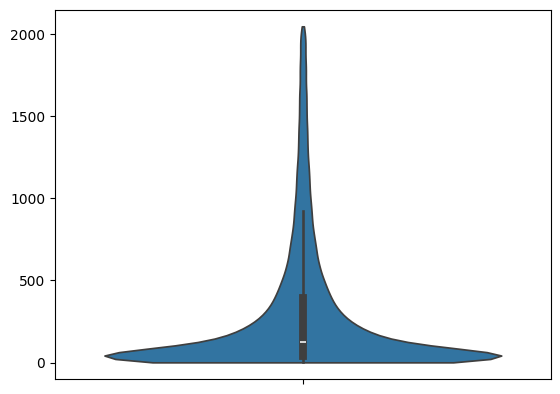

In [37]:
max_length = 1024*2
sns.violinplot(code_lengths[code_lengths <= max_length], cut=0)

In [38]:
#create a list that has only the label 0 from the all_projects
apache_jit_base_df_0 = apache_jit_base_df[apache_jit_base_df['label'] == 0]
#apache_jit_base_df_0

In [39]:
import seaborn as sns
code_lengths_0 = pd.Series(list(
    map(lambda x: join_commit_codes_sep(x,'',' ',' '),apache_jit_base_df_0['code']))).apply(lambda x: len(x.split(' ')))
code_lengths_0.describe()

count    78435.000000
mean       437.748977
std       1242.922606
min          1.000000
25%         37.000000
50%        111.000000
75%        356.000000
max      48497.000000
dtype: float64

<Axes: >

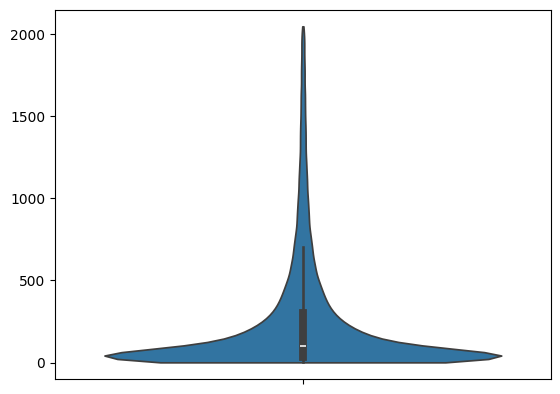

In [40]:
max_length = 1024*2
sns.violinplot(code_lengths_0[code_lengths_0 <= max_length], cut=0)

In [41]:
#create a list that has only the label 1 from the all_projects
apache_jit_base_df_1 = apache_jit_base_df[apache_jit_base_df['label'] == 1]

In [42]:
import seaborn as sns
code_lengths_1 = pd.Series(list(
    map(lambda x: join_commit_codes_sep(x,'',' ',' '),apache_jit_base_df_1['code']))).apply(lambda x: len(x.split(' ')))
code_lengths_1.describe()

count     28239.000000
mean       1215.778427
std        2601.461083
min           1.000000
25%          95.000000
50%         391.000000
75%        1192.000000
max      112848.000000
dtype: float64

<Axes: >

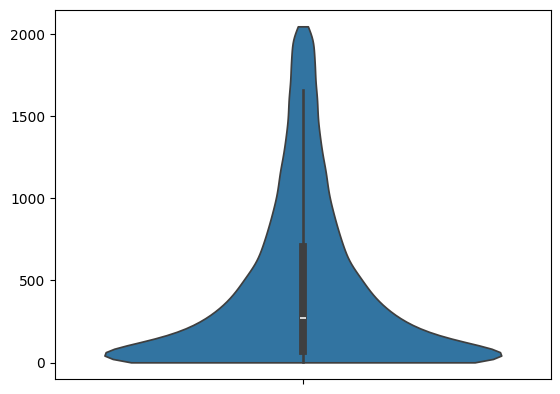

In [43]:
max_length = 1024*2
sns.violinplot(code_lengths_1[code_lengths_1 <= max_length], cut=0)

## Dataset checks:

In [105]:
version = 'v1' #'special_tokens'
train_df = pd.read_csv(f'datasets/apache_jit/train_{version}.csv')
valid_df = pd.read_csv(f'datasets/apache_jit/valid_{version}_balanced.csv')
test_df  = pd.read_csv(f'datasets/apache_jit/test_{version}.csv')

In [106]:
train_df.shape, valid_df.shape,test_df.shape

((44834, 4), (6940, 4), (7526, 4))

In [108]:
# eval code lists
train_df['code'] = train_df['code'].apply(lambda x: eval(x))
valid_df['code'] = valid_df['code'].apply(lambda x: eval(x))
test_df['code'] = test_df['code'].apply(lambda x: eval(x))

In [110]:
print(valid_df['id'].duplicated().any())
print(valid_df['label'].value_counts())

False
1    3470
0    3470
Name: label, dtype: int64


In [52]:
def get_code_lengths(codes,tokenizer=None):
    if tokenizer is None:
        return pd.Series(list(map(lambda x: join_commit_codes_sep(x,'',' ',' '),codes))).apply(lambda x: len(x.split(' ')))
    else:
        # tokenize and return input_ids length
        return pd.Series(list(map(lambda x: len(tokenizer.encode(join_commit_codes_sep(x,'',' ',' '))),codes)))

In [53]:
from transformers import BertTokenizerFast,RobertaTokenizerFast
tokenizer = RobertaTokenizerFast.from_pretrained('microsoft/codereviewer')

In [111]:
for i in range(10):
    commit_str = join_commit_codes_sep(train_df['code'].iloc[i],'<s>','</s>','\n')
    #print(commit_str)
    print(f'Words: {len(commit_str.split(" "))}')
    print(f'Tokens: {len(tokenizer.encode(commit_str))}')

Words: 169
Tokens: 613
Words: 1202
Tokens: 3536
Words: 980
Tokens: 2762
Words: 262
Tokens: 879
Words: 354
Tokens: 908
Words: 51
Tokens: 148
Words: 269
Tokens: 916
Words: 146
Tokens: 517
Words: 3358
Tokens: 8979
Words: 564
Tokens: 1659


In [112]:
clean_train_code_lengths = get_code_lengths(train_df[train_df['label'] == 0]['code'],tokenizer)
buggy_train_code_lengths = get_code_lengths(train_df[train_df['label'] == 1]['code'],tokenizer)

In [113]:
s = list(clean_train_code_lengths.values)
s = s + list(buggy_train_code_lengths.values)
train_code_lengths = pd.Series(s)

In [114]:
clean_train_code_lengths.describe()

count     22413.000000
mean       1613.071432
std        5656.586897
min           2.000000
25%         100.000000
50%         357.000000
75%        1224.000000
max      201831.000000
dtype: float64

In [115]:
buggy_train_code_lengths.describe()

count    2.242100e+04
mean     6.813634e+03
std      9.105562e+04
min      2.000000e+00
25%      3.490000e+02
50%      1.546000e+03
75%      4.837000e+03
max      7.249303e+06
dtype: float64

In [116]:
train_code_lengths.describe()

count    4.483400e+04
mean     4.213817e+03
std      6.456754e+04
min      2.000000e+00
25%      1.482500e+02
50%      7.230000e+02
75%      2.645750e+03
max      7.249303e+06
dtype: float64

In [117]:
import seaborn as sns
from matplotlib import pyplot as plt

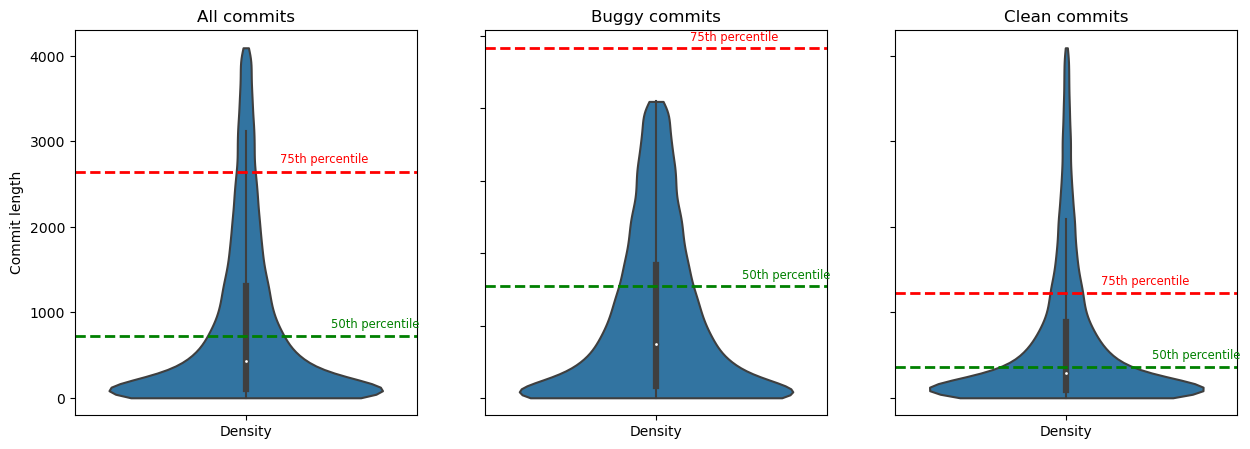

In [118]:
max_length = 4096
# create three violin plots on different axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# add label for each axis
axes[0].set_title('All commits')
axes[1].set_title('Buggy commits')
axes[2].set_title('Clean commits')
# label the y axis
axes[0].set_ylabel('Commit length')
# remove numbers from second and third axis
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
# hide x ticks

# plot the violin plots
sns.violinplot(train_code_lengths[train_code_lengths <= max_length],ax=axes[0], cut=0)
sns.violinplot(buggy_train_code_lengths[buggy_train_code_lengths <= max_length],ax=axes[1], cut=0)
sns.violinplot(clean_train_code_lengths[clean_train_code_lengths <= max_length],ax=axes[2], cut=0)
axes[0].set_xticklabels(['Density'])
axes[1].set_xticklabels(['Density'])
axes[2].set_xticklabels(['Density'])
# add a line at the 75 percentile with a label
axes[0].axhline(train_code_lengths.quantile(0.75), color='r', linestyle='dashed', linewidth=2)
axes[1].axhline(buggy_train_code_lengths.quantile(0.75), color='r', linestyle='dashed', linewidth=2)
axes[2].axhline(clean_train_code_lengths.quantile(0.75), color='r', linestyle='dashed', linewidth=2)
# add lines labels
axes[0].text(0.1, train_code_lengths.quantile(0.75)+100, '75th percentile', horizontalalignment='left', size='small', color='r')
axes[1].text(0.1, buggy_train_code_lengths.quantile(0.75)+100, '75th percentile', horizontalalignment='left', size='small', color='r')
axes[2].text(0.1, clean_train_code_lengths.quantile(0.75)+100, '75th percentile', horizontalalignment='left', size='small', color='r')
# add a line at the 50 percentile with a label
axes[0].axhline(train_code_lengths.quantile(0.5), color='g', linestyle='dashed', linewidth=2)
axes[1].axhline(buggy_train_code_lengths.quantile(0.5), color='g', linestyle='dashed', linewidth=2)
axes[2].axhline(clean_train_code_lengths.quantile(0.5), color='g', linestyle='dashed', linewidth=2)
# add lines labels
axes[0].text(0.25, train_code_lengths.quantile(0.5)+100, '50th percentile', horizontalalignment='left', size='small', color='g')
axes[1].text(0.25, buggy_train_code_lengths.quantile(0.5)+100, '50th percentile', horizontalalignment='left', size='small', color='g')
axes[2].text(0.25, clean_train_code_lengths.quantile(0.5)+100, '50th percentile', horizontalalignment='left', size='small', color='g')
# save figure without extra white space
plt.savefig(f'apache_jit_{version}_commit_length_violin.png', bbox_inches='tight', dpi=200)